### Original Testset Update

In [ ]:
import json

# Input and output paths
file_path = "../../../04_data/datasets/gerestaurant/test.json"
output_path = "test_original_gerestaurant_updated_labels.jsonl"

# Label mapping
label_map = {
    "price": "preis",
    "ambience": "ambiente",
    "service": "service",
    "general impression": "gesamteindruck",
    "food": "essen"
}

# Transform labels
with open(file_path, "r", encoding="utf-8") as infile, open(output_path, "w", encoding="utf-8") as outfile:
    for line in infile:
        entry = json.loads(line)
        # map each label
        new_labels = [
            [label_map.get(category, category), sentiment, target]
            for category, sentiment, target in entry["labels"]
        ]
        entry["id"] = str(entry["id"])  # ensure id is a string
        entry["labels"] = new_labels
        # write back as JSONL
        outfile.write(json.dumps(entry, ensure_ascii=False) + "\n")

print(f"✅ Transformed file saved to: {output_path}")


✅ Transformed file saved to: train_mapped.jsonl


## Data Gathering

In [8]:
import json

name_list = ["../../../11_annotations/ground_truth/tasd_testset_low.jsonl",
             "../../../11_annotations/text_only/test_original_gerestaurant_updated_labels.jsonl"]

# ===== CONFIG =====
include_conflict = False  # <-- SWITCH: set False to remove Conflict column
categories = ['ambiente', 'essen', 'gesamteindruck', 'preis', 'service']
# ==================

# Define polarity order and labels
if include_conflict:
    polarities = ['positive', 'negative', 'neutral', 'conflict']
else:
    polarities = ['positive', 'negative', 'neutral']

for name in name_list:
    print(f"% ===== FILE: {name} ===== \n\n")
    file_name = name
    # Initialize stats
    stats = {cat: {pol: {'explicit': 0, 'implicit': 0}
                for pol in polarities} for cat in categories}

    # Read JSONL file
    with open(file_name, "r", encoding="utf-8") as f:
        for line in f:
            entry = json.loads(line)
            for cat, pol, phrase in entry["labels"]:
                # Map German to English polarities
                pol_map = {
                    'Positiv': 'Positive',
                    'Negativ': 'Negative',
                    'Neutral': 'Neutral',
                    'Konflikt': 'Conflict'
                }
                pol_eng = pol_map.get(pol, pol)
                if cat in stats and pol_eng in stats[cat]:
                    if phrase == "NULL":
                        stats[cat][pol_eng]['implicit'] += 1
                    else:
                        stats[cat][pol_eng]['explicit'] += 1

    # Prepare totals for each column
    col_totals = {pol: {'explicit': 0, 'implicit': 0} for pol in polarities}
    total_totals = {'explicit': 0, 'implicit': 0}

    # ===== LaTeX OUTPUT =====
    print(r"\begin{table}[h!]")
    print(r"\centering")
    print(
        r"\caption{Counts of polarity triplets by category, with explicit/implicit split}")
    print(r"\label{tab:triplet_counts}")

    # Define column alignment
    col_format = "l" + "cc" * len(polarities) + "cc"
    print(r"\begin{tabular}{" + col_format + "}")

    # First header row
    first_header = [" "]
    for pol in polarities:
        first_header.append(r"\multicolumn{2}{c}{\textbf{" + pol + "}}")
    first_header.append(r"\multicolumn{2}{c}{\textbf{Total}}")
    print(" & ".join(first_header) + r" \\ \hline")

    # Second header row
    second_header = [r"\textbf{Aspect Category}"]
    for _ in polarities + ["Total"]:
        second_header += [r"\textbf{Expl.}", r"\textbf{Impl.}"]
    print(" & ".join(second_header) + r"\\")
    print(r"\midrule")

    # Data rows
    for cat in categories:
        row = [cat]
        total_explicit = 0
        total_implicit = 0
        for pol in polarities:
            e = stats[cat][pol]['explicit']
            i = stats[cat][pol]['implicit']
            row += [str(e), str(i)]
            total_explicit += e
            total_implicit += i
            col_totals[pol]['explicit'] += e
            col_totals[pol]['implicit'] += i
        total_totals['explicit'] += total_explicit
        total_totals['implicit'] += total_implicit
        row += [str(total_explicit), str(total_implicit)]
        # print(" & ".join(row) + r" \\")
        print(",".join(row))

    # Totals row
    print(r"\hline")
    totals_row = [r"Total"]
    for pol in polarities:
        totals_row.append(str(col_totals[pol]['explicit']))
        totals_row.append(str(col_totals[pol]['implicit']))
    totals_row.append(str(total_totals['explicit']))
    totals_row.append(str(total_totals['implicit']))
    # print(" & ".join(totals_row) + r" \\")
    print(",".join(totals_row))
    print(r"\bottomrule")
    print(r"\end{tabular}")
    print(r"\end{table}")
    print("\n\n")


% ===== FILE: ../../../11_annotations/ground_truth/tasd_testset_low.jsonl ===== 


\begin{table}[h!]
\centering
\caption{Counts of polarity triplets by category, with explicit/implicit split}
\label{tab:triplet_counts}
\begin{tabular}{lcccccccc}
  & \multicolumn{2}{c}{\textbf{positive}} & \multicolumn{2}{c}{\textbf{negative}} & \multicolumn{2}{c}{\textbf{neutral}} & \multicolumn{2}{c}{\textbf{Total}} \\ \hline
\textbf{Aspect Category} & \textbf{Expl.} & \textbf{Impl.} & \textbf{Expl.} & \textbf{Impl.} & \textbf{Expl.} & \textbf{Impl.} & \textbf{Expl.} & \textbf{Impl.}\\
\midrule
ambiente,80,5,27,11,1,0,108,16
essen,244,22,157,19,37,0,438,41
gesamteindruck,29,100,26,98,3,7,58,205
preis,11,0,40,5,9,4,60,9
service,145,18,108,41,3,0,256,59
\hline
Total,509,145,358,174,53,11,920,330
\bottomrule
\end{tabular}
\end{table}



% ===== FILE: ../../../11_annotations/text_only/test_original_gerestaurant_updated_labels.jsonl ===== 


\begin{table}[h!]
\centering
\caption{Counts of polarity triplets

### Visualization

category        FOOD  SERVICE  GENERAL  AMBIENCE  PRICE
name                                                   
GERestaurant     510      320      236       130     79
New Annotation   479      315      263       124     69


C:\Users\nikla\AppData\Local\Temp\ipykernel_22444\65708809.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("Set3", pivot_df.shape[1]).colors


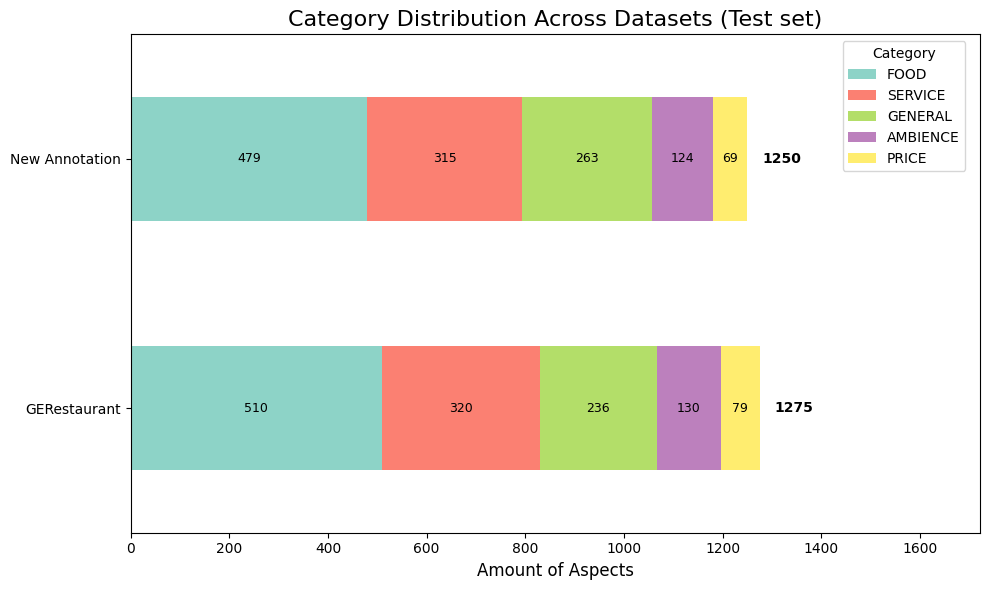

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# Load Excel
file_path = "ground_truth_comparison.xlsx"
df = pd.read_excel(file_path)

# Drop total rows
df = df[df["category"] != "Total"]

# Create new column summing explicit + implicit per label
df["positive"] = df["positive-explicit"] + df["positive-implicit"]
df["negative"] = df["negative-explicit"] + df["negative-implicit"]
df["neutral"] = df["neutral-explicit"] + df["neutral-implicit"]

# Sum across polarities to get total per category
df["total"] = df["positive"] + df["negative"] + df["neutral"]

# Pivot so that categories become stacked segments
pivot_df = df.pivot(index="name", columns="category", values="total")

# Optional: rename datasets and categories
dataset_names = {"ground_truth_original": "GERestaurant", "ground_truth": "New Annotation"}
category_names = {
    "ambiente": "AMBIENCE",
    "essen": "FOOD",
    "gesamteindruck": "GENERAL",
    "preis": "PRICE",
    "service": "SERVICE"
}

pivot_df = pivot_df.rename(index=dataset_names, columns=category_names)
pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]
print(pivot_df)
colors = cm.get_cmap("Set3", pivot_df.shape[1]).colors  
# Plot stacked bar chart
ax = pivot_df.plot(
    kind="barh",
    stacked=True,
    figsize=(10, 6),
    color=colors
)
max_val = pivot_df.sum(axis=1).max()
# Add numbers on bars
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=9)
for i, total in enumerate(pivot_df.sum(axis=1)):
    ax.text(
        total + 30,  # offset a little to the right of the bar
        i,          # y-position
        str(total), # text to display
        va='center',
        fontsize=10,
        fontweight='bold'
    )
# Styling
plt.xlim(0, max_val * 1.35)
plt.title("Category Distribution Across Datasets (Test set)", fontsize=16)
plt.xlabel("Amount of Aspects", fontsize=12)
plt.ylabel("", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Category", bbox_to_anchor=(0.83, 1), loc="upper left")
plt.tight_layout()
plt.savefig("category_distribution_ground_truth.pdf", bbox_inches="tight")
plt.show()


,Explicit,Implicit
name,,
GERestaurant,914,361
New Annotation,920,330


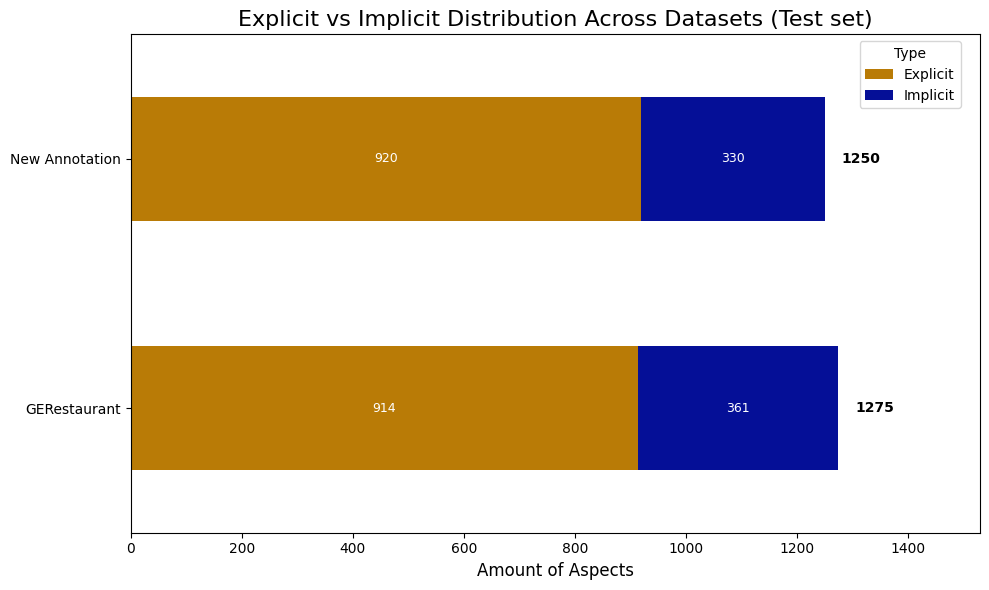

In [24]:
# Sum explicit and implicit counts across all categories for each dataset
df_explicit_implicit = df.groupby("name").agg({
    "positive-explicit": "sum",
    "negative-explicit": "sum",
    "neutral-explicit": "sum",
    "positive-implicit": "sum",
    "negative-implicit": "sum",
    "neutral-implicit": "sum"
})
colors = ["#b97b06", "#050F97"]
# Create total explicit and implicit columns
df_explicit_implicit["Explicit"] = df_explicit_implicit[[
    "positive-explicit", "negative-explicit", "neutral-explicit"]].sum(axis=1)
df_explicit_implicit["Implicit"] = df_explicit_implicit[[
    "positive-implicit", "negative-implicit", "neutral-implicit"]].sum(axis=1)

# Keep only the new columns
df_explicit_implicit = df_explicit_implicit[["Explicit", "Implicit"]]

# Rename datasets
df_explicit_implicit = df_explicit_implicit.rename(index=dataset_names)

# Sort datasets by total aspects
df_explicit_implicit = df_explicit_implicit.loc[df_explicit_implicit.sum(axis=1).sort_values(ascending=False).index]
display(df_explicit_implicit)
# Plot horizontal stacked bar chart
ax = df_explicit_implicit.plot(kind="barh", stacked=True, figsize=(10, 6), color=colors)
max_val = df_explicit_implicit.sum(axis=1).max()
# Add numbers inside bars
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=9, color='white')
for i, total in enumerate(df_explicit_implicit.sum(axis=1)):
    ax.text(
        total + 30,  # offset a little to the right of the bar
        i,          # y-position
        str(total), # text to display
        va='center',
        fontsize=10,
        fontweight='bold'
    )
# Styling
plt.xlim(0, max_val * 1.2)
plt.title("Explicit vs Implicit Distribution Across Datasets (Test set)", fontsize=16)
plt.xlabel("Amount of Aspects", fontsize=12)
plt.ylabel("")
plt.legend(title="Type", bbox_to_anchor=(0.85, 1), loc="upper left")
plt.tight_layout()
plt.show()


,positive,negative,neutral
name,,,
GERestaurant,672,539,64
New Annotation,654,532,64


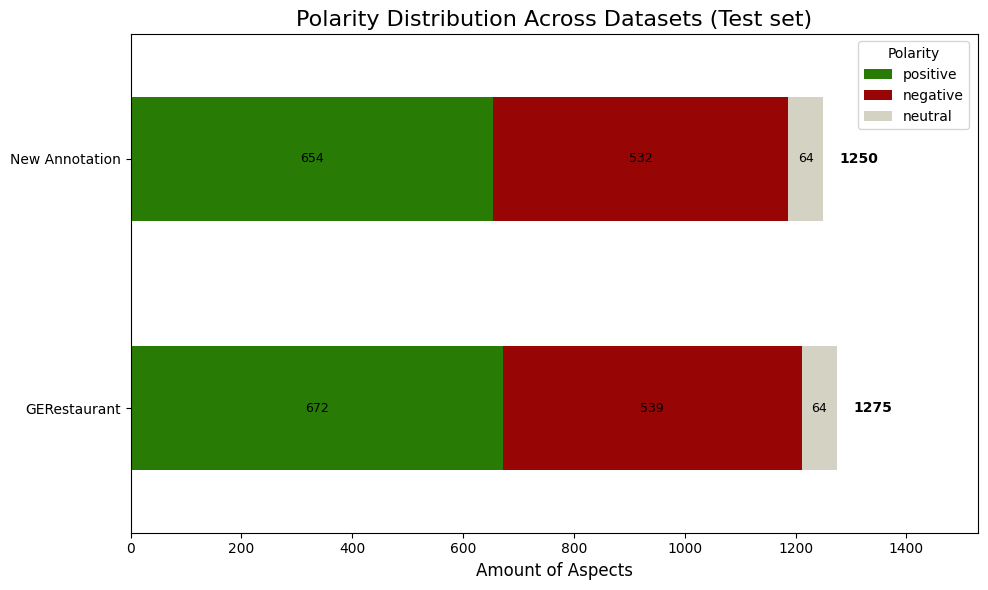

In [23]:
# Prepare polarity sums
df_polarity = df.copy()
df_polarity = df_polarity.groupby("name")[["positive", "negative", "neutral"]].sum()
colors = ["#287c06", "#970505", "#d4d2c3"]
# Rename datasets
df_polarity = df_polarity.rename(index=dataset_names)

# Sort datasets by total aspects
df_polarity = df_polarity.loc[df_polarity.sum(axis=1).sort_values(ascending=False).index]
display(df_polarity)
max_val = df_polarity.sum(axis=1).max()

# Plot
ax = df_polarity.plot(kind="barh", stacked=True, figsize=(10, 6), color=colors)
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=9)

for i, total in enumerate(df_polarity.sum(axis=1)):
    ax.text(
        total + 30,  # offset a little to the right of the bar
        i,          # y-position
        str(total), # text to display
        va='center',
        fontsize=10,
        fontweight='bold'
    )
plt.xlim(0, max_val * 1.2)
plt.title("Polarity Distribution Across Datasets (Test set)", fontsize=16)
plt.xlabel("Amount of Aspects", fontsize=12)
plt.ylabel("")
plt.legend(title="Polarity", bbox_to_anchor=(0.85, 1), loc="upper left")
plt.tight_layout()
plt.show()
